# Sonification of Spectograms (work in progress)

In [1]:
import librosa
import librosa.display
import libfmp
import numpy as np
import os
from IPython import display as ipd
import matplotlib.pyplot as plt

from libsoni.core.spectrum import sonify_spectrum

%matplotlib inline
Fs = 22050

## Sound Example

In [2]:
x, Fs = librosa.load(os.path.join('data_audio','samples','01Pia1F060f_np___0.wav'))
print('Original Audio:')
ipd.display(ipd.Audio(x, rate=Fs))

Original Audio:


## Performing STFT

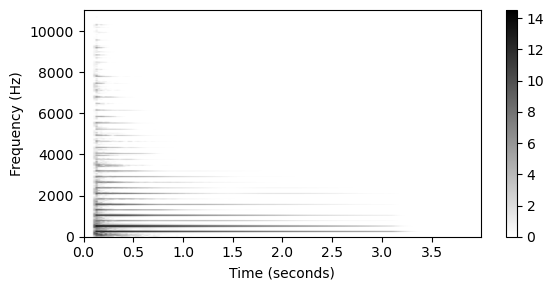

In [3]:
N = 128*8
H = int(N/2)

color = 'gray_r' 

X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann', pad_mode='constant', center=True)

Y = np.log(1 + 100 * np.abs(X) ** 2)

T_coef = np.arange(X.shape[1]) * H / Fs
T_coef_librosa = librosa.frames_to_time(np.arange(X.shape[1]), sr=Fs, hop_length=H)

K = N // 2
F_coef = np.arange(K+1) * Fs / N
F_coef_librosa = librosa.fft_frequencies(sr=Fs, n_fft=N)

plt.figure(figsize=(6, 3))
extent = [T_coef[0], T_coef[-1], F_coef[0], F_coef[-1]]
plt.imshow(Y, cmap=color, aspect='auto', origin='lower', extent=extent)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.tight_layout()
plt.show()

In [4]:
Y_soni = sonify_spectrum(Y, F_coef, T_coef)
ipd.display(ipd.Audio(Y_soni, rate = Fs))

## Scenario: *Frühlingstraum (Dream of Spring)* by *Franz Schubert*
<img src="figures/demo_spectrum/FMP_B_Sonify_Pitch_Schubert_D911-11_A.png" alt="Frühlingstraum" width="600">

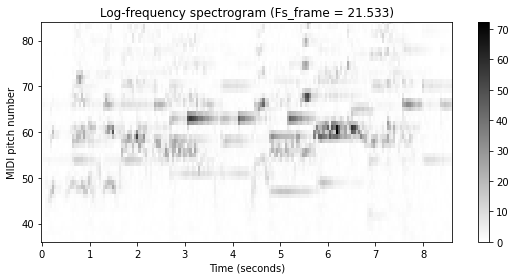

Sonification of log-frequency spectrogram with libsoni:


Sonification of log-frequency spectrogram (mono):


Sonification of log-frequency spectrogram and original audio (stereo):


In [7]:
# Log-frequency spectrogrm from audio recording
schubert_audio, Fs = librosa.load(os.path.join('data_audio', 'demo_spectrum', 'FMP_B_Sonify_Pitch_Schubert_D911-11_SC06.wav'), sr=Fs)

H = 512*2
X_CQT = np.abs(librosa.cqt(y=schubert_audio, sr=Fs, hop_length=H,norm=2))
num_frames = X_CQT.shape[1]
X_wav = np.zeros((128, num_frames))
X_wav[23:23+84, :] = X_CQT


#X = libfmp.c3.normalize_feature_sequence(X, norm='2')
Fs_frame = Fs / H

title='Log-frequency spectrogram (Fs_frame = %.3f)' % Fs_frame

libfmp.b.plot_matrix(X_wav, Fs=Fs_frame, ylabel='MIDI pitch number', 
                     title=title, figsize=(8, 4))
plt.ylim([36, 84])
plt.show()

freqs = 440 * 2 ** ((np.arange(0,128)-69) / 12)

times = np.arange(start=0, stop=num_frames*H, step = H)/Fs

Y_soni = sonify_spectrum(X_wav, freqs, times)

print('Sonification of log-frequency spectrogram with libsoni:')
ipd.display(ipd.Audio(Y_soni, rate=Fs))

# Sonification
harmonics = [1]
fading_msec = 0.5
x_pitch_wav, x_pitch_wav_stereo = \
    libfmp.b.sonify_pitch_activations_with_signal(X_wav, schubert_audio, Fs_frame, Fs, 
                                                  fading_msec=fading_msec, 
                                                  harmonics_weights=harmonics)
print('Sonification of log-frequency spectrogram (mono):')
ipd.display(ipd.Audio(x_pitch_wav, rate=Fs) )
print('Sonification of log-frequency spectrogram and original audio (stereo):')
ipd.display(ipd.Audio(x_pitch_wav_stereo, rate=Fs))

11.025